In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

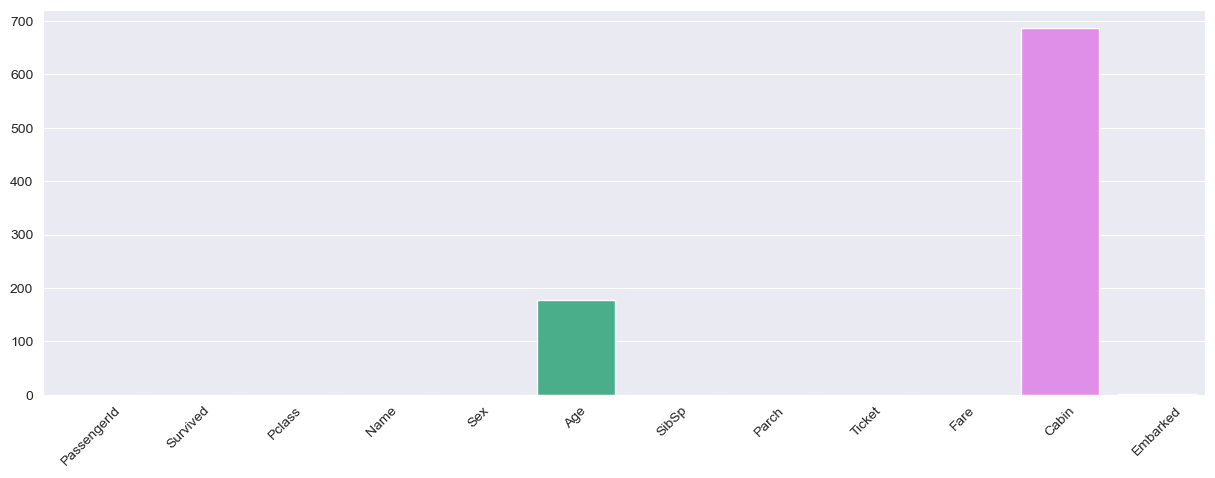

In [7]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

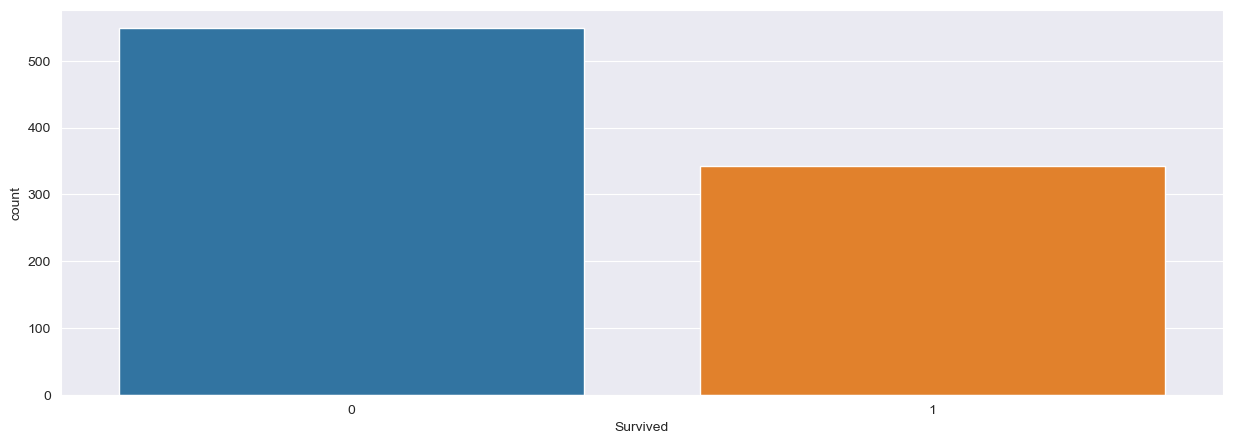

In [8]:
sns.countplot(x=titanic_data['Survived'])
plt.show()

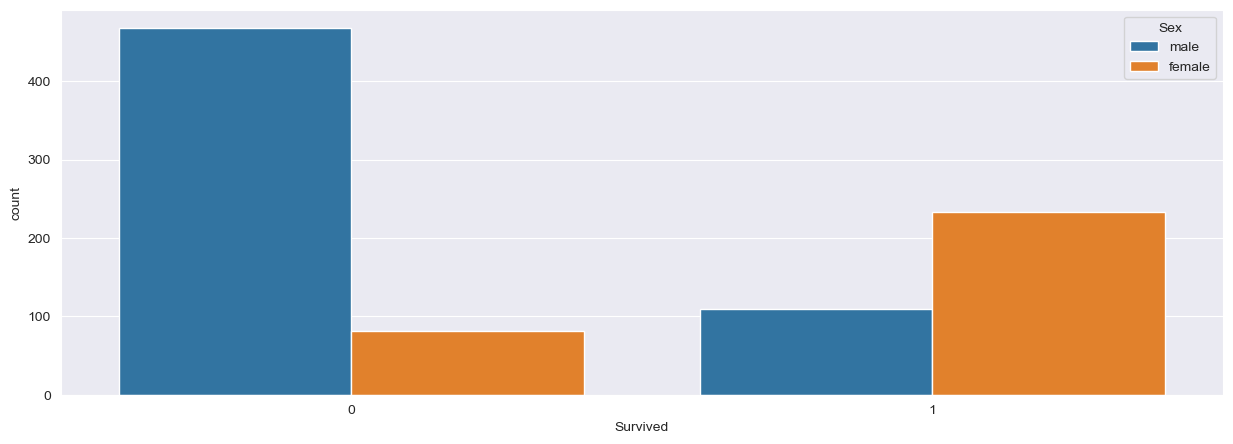

In [9]:
sns.countplot(x=titanic_data['Survived'], hue='Sex', data=titanic_data)
plt.show()

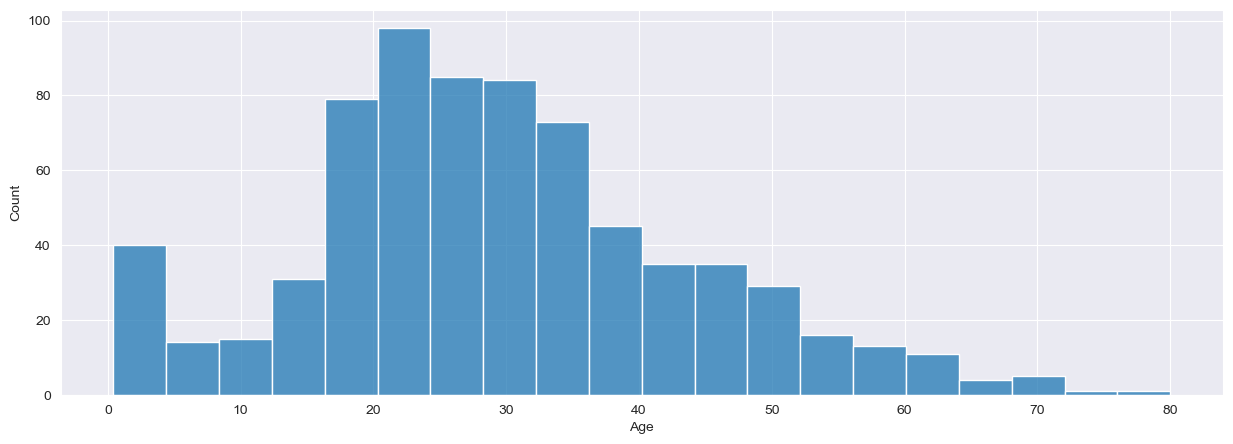

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
sns.histplot(x=titanic_data['Age'].dropna())
plt.show()
titanic_data['Age'].describe()

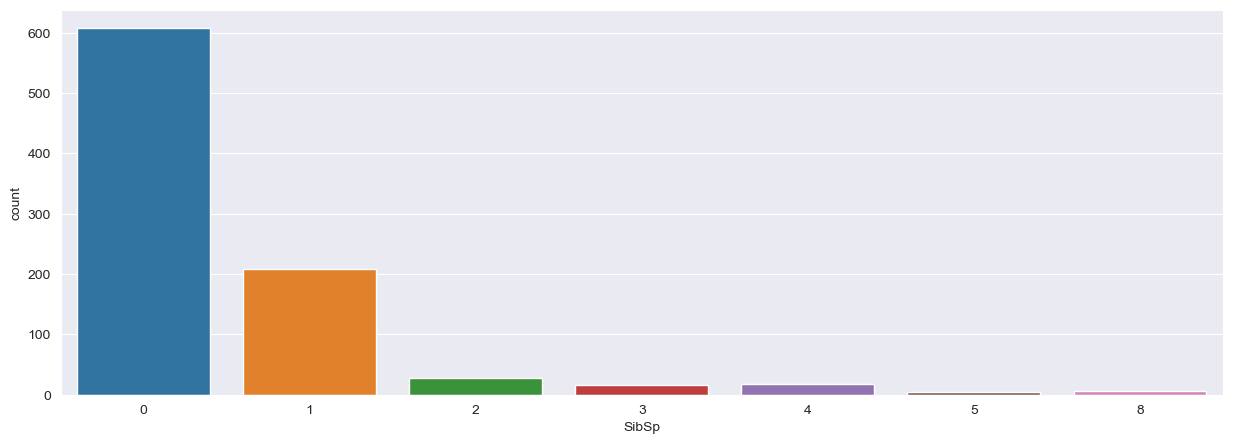

In [11]:
sns.countplot(x=titanic_data['SibSp'])
plt.show()

In [12]:
counts = titanic_data['SibSp'].value_counts()
two_or_more = titanic_data[titanic_data['SibSp'].map(counts)<200].PassengerId.count()

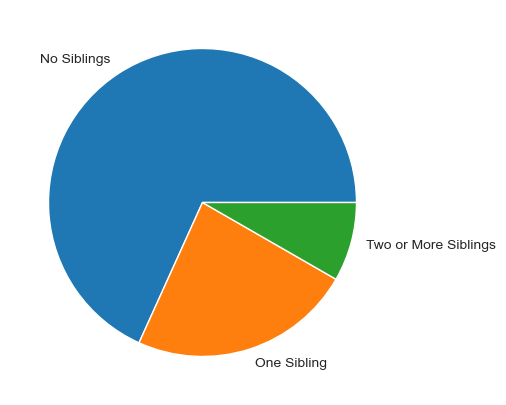

In [13]:
data = np.append(titanic_data['SibSp'].value_counts().head(2).values, two_or_more)
plt.pie(data,labels=['No Siblings', 'One Sibling', 'Two or More Siblings'])
plt.show()

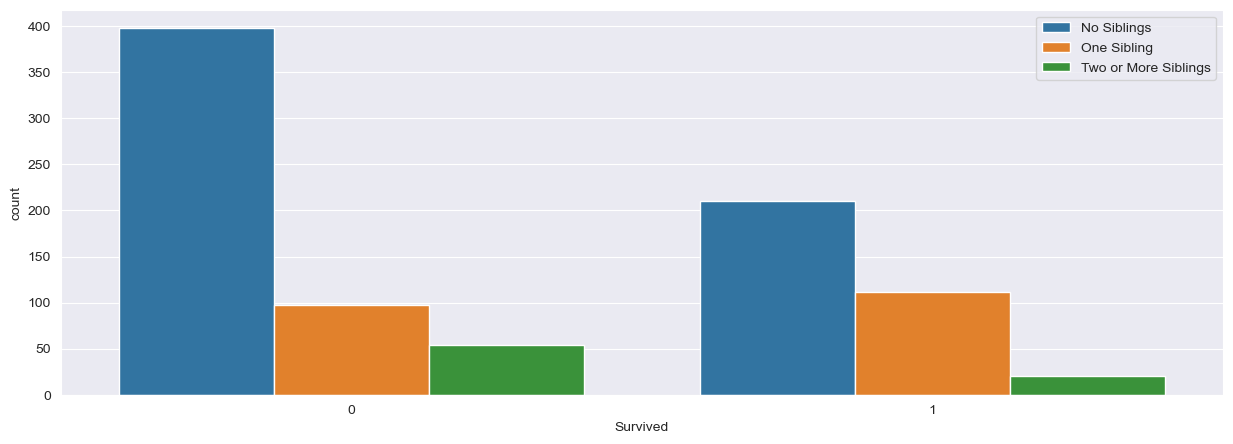

In [14]:
titanic_copy = titanic_data.copy(deep=True)
titanic_copy['SibBin']=titanic_copy['SibSp']
titanic_copy['SibBin'].where(titanic_copy['SibBin'] < 2, 2, inplace=True)

sns.countplot(x=titanic_copy['Survived'], hue='SibBin', data=titanic_copy)
plt.legend(['No Siblings', 'One Sibling', 'Two or More Siblings'])
plt.show()

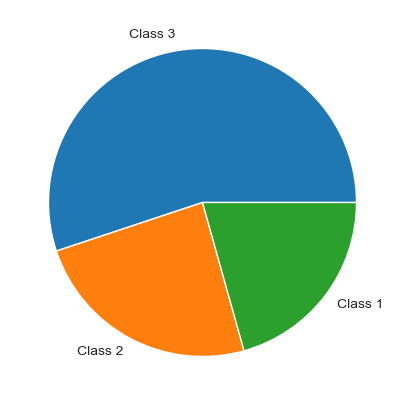

In [15]:
#show class distribution
plt.pie(titanic_data['Pclass'].value_counts().values,labels=['Class 3', 'Class 2', 'Class 1'])
plt.show()

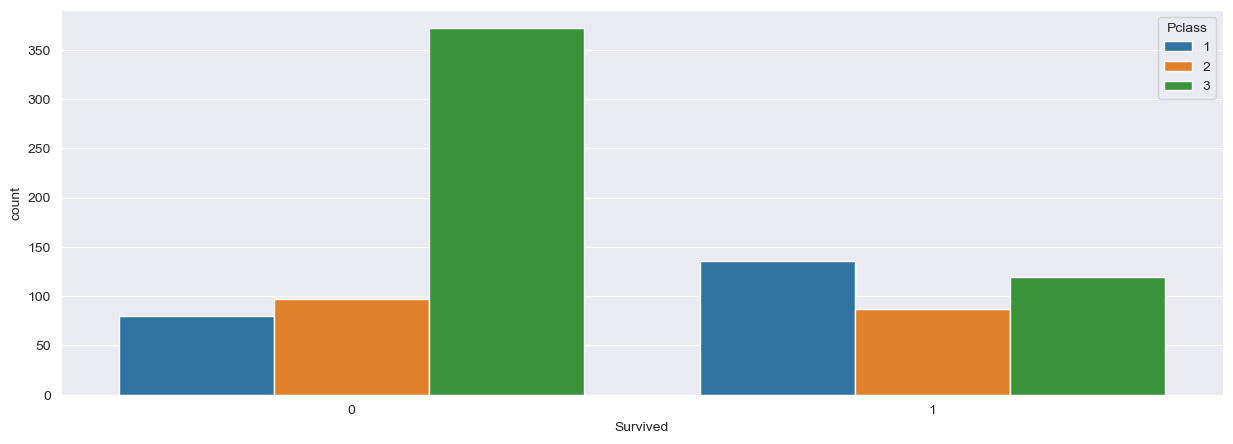

In [16]:
sns.countplot(x=titanic_data['Survived'], hue='Pclass', data=titanic_data)
plt.show()

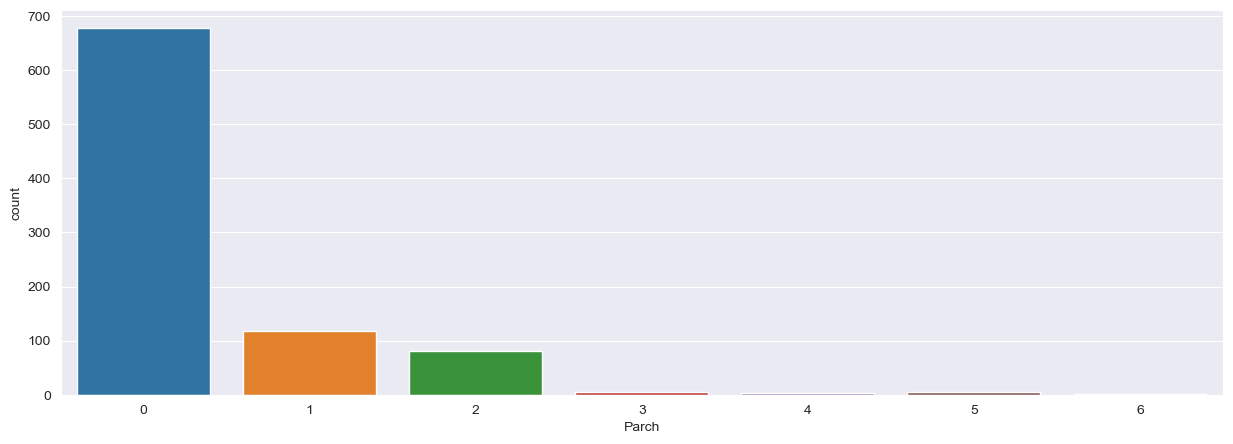

In [17]:
sns.countplot(x=titanic_data['Parch'])
plt.show()

In [18]:
titanic_data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [19]:
counts = titanic_data['Parch'].value_counts()
two_or_more = titanic_data[titanic_data['Parch'].map(counts)<75].PassengerId.count()

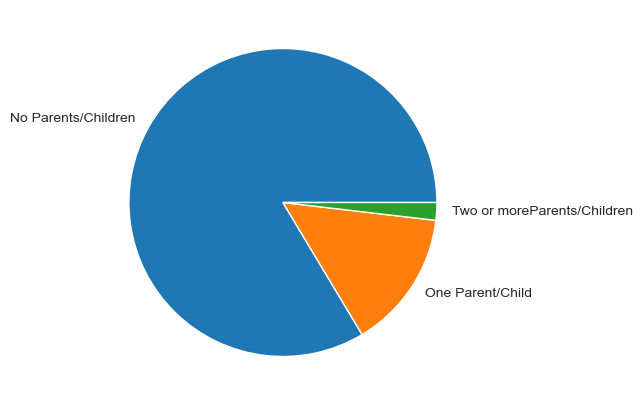

In [20]:
data = np.append(titanic_data['Parch'].value_counts().head(2).values, two_or_more)
plt.pie(data,labels=['No Parents/Children', 'One Parent/Child', 'Two or moreParents/Children'])
plt.show()

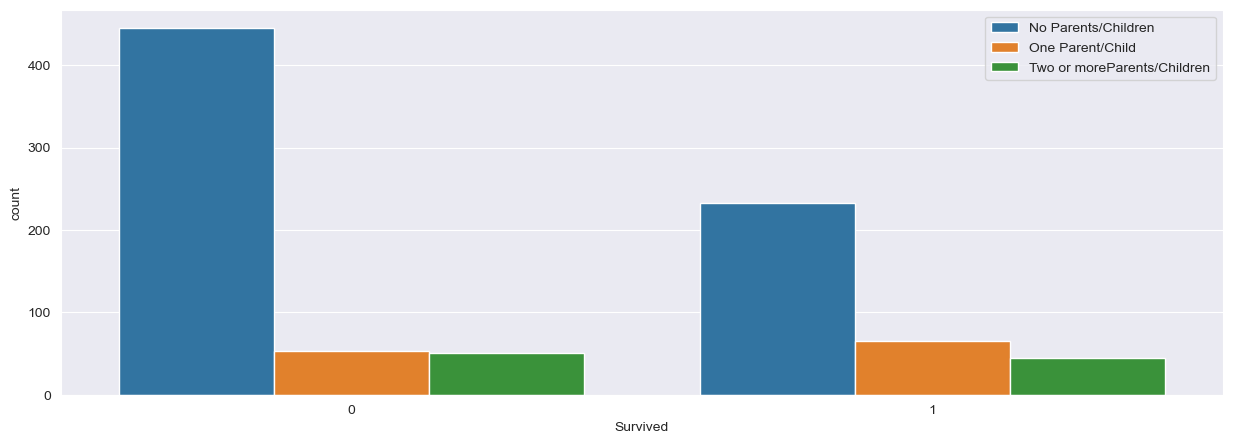

In [21]:
titanic_copy['ParchBin']=titanic_copy['Parch']
titanic_copy['ParchBin'].where(titanic_copy['ParchBin'] < 2, 2, inplace=True)

sns.countplot(x=titanic_copy['Survived'], hue='ParchBin', data=titanic_copy)
plt.legend(['No Parents/Children', 'One Parent/Child', 'Two or moreParents/Children'])
plt.show()

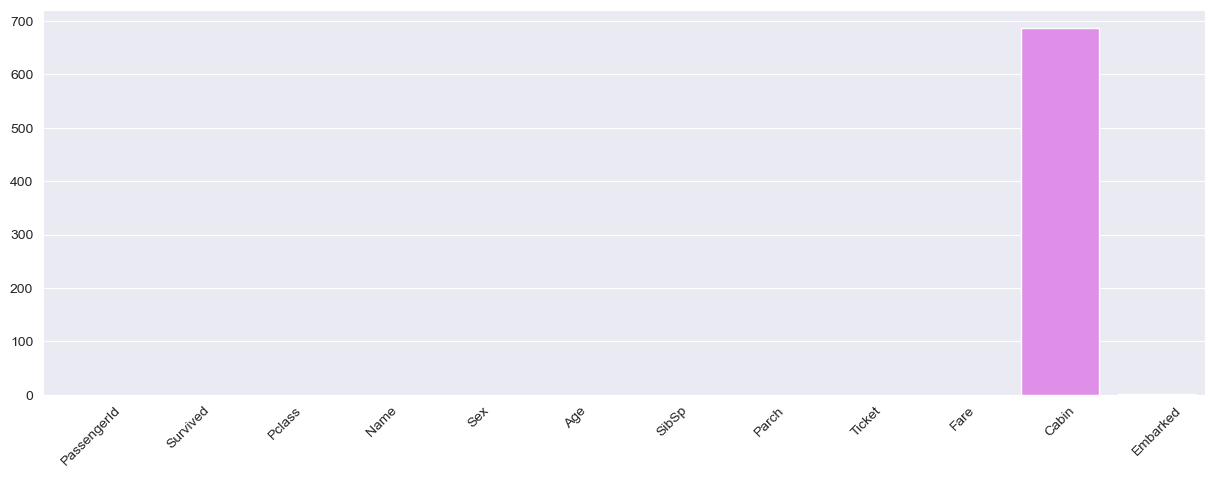

In [22]:
mean_age = int(titanic_data['Age'].mean())
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)

sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [23]:
titanic_data.drop(labels=['Cabin'], axis=1, inplace=True)
titanic_data.dropna(inplace=True)

In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
titanic_data = pd.get_dummies(data=titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
titanic_data.drop(labels=['Name','Ticket'], axis=1, inplace=True)

In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_male     889 non-null    bool   
 8   Embarked_Q   889 non-null    bool   
 9   Embarked_S   889 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 58.2 KB


In [29]:
from sklearn.model_selection import train_test_split

X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q',
                        'Embarked_S']]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=500)

In [31]:
#Model Evaluation
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[145  17]
 [ 65  40]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       162
           1       0.70      0.38      0.49       105

    accuracy                           0.69       267
   macro avg       0.70      0.64      0.64       267
weighted avg       0.69      0.69      0.67       267



In [32]:
mlp = MLPClassifier(max_iter=3000, activation='logistic', hidden_layer_sizes=(1000,900))
mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[146  16]
 [ 43  62]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       162
           1       0.79      0.59      0.68       105

    accuracy                           0.78       267
   macro avg       0.78      0.75      0.75       267
weighted avg       0.78      0.78      0.77       267

